# Training data used in creating the emulator
We provide the power spectrum boost parameters required to train the emulator for Modified Gravity Cosmology. 

In [3]:
import numpy as np 
import matplotlib.pylab as plt
#from pandas.plotting import scatter_matrix
#import pandas as pd

In [4]:
import MAS_library as MASL

/Users/gev866/anaconda/envs/Pylians_env/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
snapshot = '/Users/gev866/Downloads/snapshottest_69'
grid     = 512  
ptypes   = [1] 
MAS      = 'CIC' 
do_RSD   = False
axis     = 0 

delta = MASL.density_field_gadget(snapshot, ptypes, grid, MAS, do_RSD, axis)
delta /= np.mean(delta, dtype=np.float64);  delta -= 1.0


Computing density field of particles [1]
1.34217728e+08 should be equal to
1.34217728e+08
Time taken = 9.82 seconds


In [15]:
threads=16
import Pk_library as PKL
BoxSize=240

In [16]:
Pk = PKL.Pk(delta, BoxSize, axis, MAS, threads)


Computing power spectrum of the field...
Time to complete loop = 4.56
Time taken = 5.16 seconds


In [17]:
k       = Pk.k3D
Pk0     = Pk.Pk[:,0] #monopole
Pk2     = Pk.Pk[:,1] #quadrupole
Pk4     = Pk.Pk[:,2] #hexadecapole
Pkphase = Pk.Pkphase #power spectrum of the phases
Nmodes  = Pk.Nmodes3D

In [21]:
snapshotC = '/Users/gev866/Downloads/snapshotC_69'
deltaC = MASL.density_field_gadget(snapshotC, ptypes, grid, MAS, do_RSD, axis)
deltaC /= np.mean(deltaC, dtype=np.float64);  deltaC -= 1.0


Computing density field of particles [1]
1.34217722e+08 should be equal to
1.34217728e+08
Time taken = 11.02 seconds


In [22]:
PkC = PKL.Pk(deltaC, BoxSize, axis, MAS, threads)


Computing power spectrum of the field...
Time to complete loop = 4.54
Time taken = 5.11 seconds


In [29]:
kC       = PkC.k3D
Pk0C     = PkC.Pk[:,0]

In [59]:
snapshot2LPTC = '/Users/gev866/Downloads/2LPT512test'
#snapshot2LPTC = '/Users/gev866/Downloads/IClens/2LPT_lensfid_0.dat'#2LPT512test'
delta2LPTC = MASL.density_field_gadget(snapshot2LPTC, ptypes, grid, MAS, do_RSD, axis)
delta2LPTC /= np.mean(delta2LPTC, dtype=np.float64);  delta2LPTC -= 1.0


Computing density field of particles [1]
1.34217728e+08 should be equal to
1.34217728e+08
Time taken = 8.79 seconds


In [60]:
Pk2LPTC = PKL.Pk(delta2LPTC, BoxSize, axis, MAS, threads)
k2LPTC       = Pk2LPTC.k3D
Pk02LPTC     = Pk2LPTC.Pk[:,0]


Computing power spectrum of the field...
Time to complete loop = 4.35
Time taken = 4.94 seconds


In [61]:
#snapshot2LPTC = '/Users/gev866/Downloads/2LPT512test'
snapshot2LPTF = '/Users/gev866/Downloads/IClens/2LPT_lensfid_0.dat'#2LPT512test'
delta2LPTF = MASL.density_field_gadget(snapshot2LPTF, ptypes, grid, MAS, do_RSD, axis)
delta2LPTF /= np.mean(delta2LPTF, dtype=np.float64);  delta2LPTF -= 1.0


Computing density field of particles [1]
1.34217728e+08 should be equal to
1.34217728e+08
Time taken = 10.60 seconds


In [62]:
Pk2LPTF = PKL.Pk(delta2LPTF, BoxSize, axis, MAS, threads)
k2LPTF       = Pk2LPTF.k3D
Pk02LPTF     = Pk2LPTF.Pk[:,0]


Computing power spectrum of the field...
Time to complete loop = 4.68
Time taken = 5.32 seconds


In [53]:
kCC, Pk512C = np.loadtxt('/Users/gev866/Downloads/pkCOLA512C_z0.txt', unpack=True)

In [66]:
np.savetxt('/Users/gev866/Downloads/Pk2LPTC.txt', np.array([k2LPTC, Pk02LPTC]).T, fmt='%.7e')
np.savetxt('/Users/gev866/Downloads/Pk2LPTF.txt', np.array([k2LPTF, Pk02LPTF]).T, fmt='%.7e')

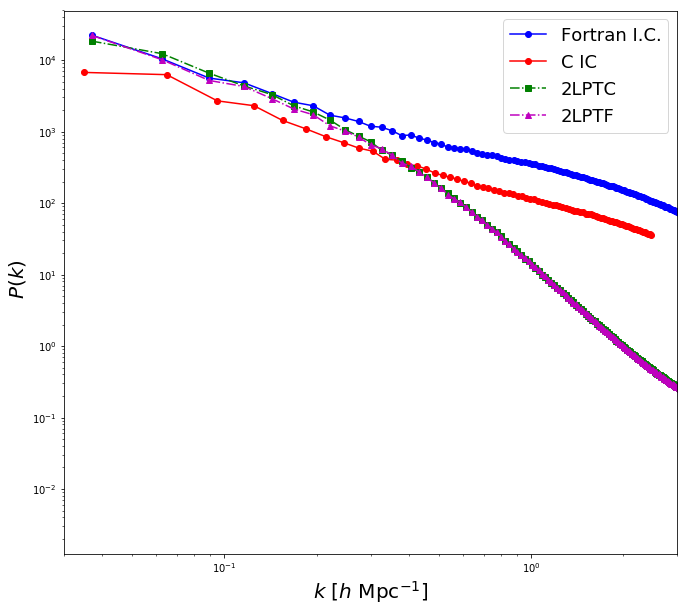

In [63]:
plt.figure('COL2', figsize=(11, 10) )
#plt.loglog(k100/hfid, Pk100, marker='o', linestyle='-', color='b', label='COLA z=0.0')
plt.loglog(k, Pk0, marker='o', linestyle='-', color='b', label='Fortran I.C.')
#plt.loglog(kC, Pk0C, marker='o', linestyle='-', color='r', label='C I.C.')
plt.loglog(kCC/0.72, Pk512C, marker='o', linestyle='-', color='r', label='C IC')
plt.loglog(k2LPTC, Pk02LPTC , marker='s', linestyle='-.', color='g', label='2LPTC')
plt.loglog(k2LPTF, Pk02LPTF , marker='^', linestyle='-.', color='m', label='2LPTF')

#plt.loglog(kCC/hfid, Pk512C, marker='o', linestyle='-', color='b', label='C IC')

#plt.loglog(kF/hfid, Pklin_33.P(0.0, kF/hfid), color='r', linestyle='-.', label='Halofit ')

plt.legend(loc="best", frameon=True, numpoints=1, prop={'size':18})
plt.xlim(0.03, 3)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=20)
plt.ylabel(r"$\ P(k)$",fontsize=20)
plt.show()

In [2]:
################ I/O #####################
dataDir = "../mgemu/data/" ## Data folder

## Cosmological parameters in the Latin-hypercube (LHC) design
The training design consists of 50 Cosmologies with varying 3 $\Lambda$CDM parameters and 2 $f(R)$ Hu-Sawicki model parameters. 

$\theta = \left[\Omega_m h^2, n_s, \sigma_8, f_{R_0}, n \right]$

LHC Sampling ensures a good coverage in the parameter space. We choose logarithm of $f_{R_0}$ to deal with large dynamical range.

In [3]:
paramIn = dataDir + 'mg_log_val_2.design'
parameter_array = np.loadtxt(paramIn)[:50, :]
parameter_array[:, 3] = np.log10(parameter_array[:, 3])
allLabels = ['${\Omega}_m h^2$', '$n_s$', '${\sigma}_8$', '$log(f_{R_0})$', '$n$']

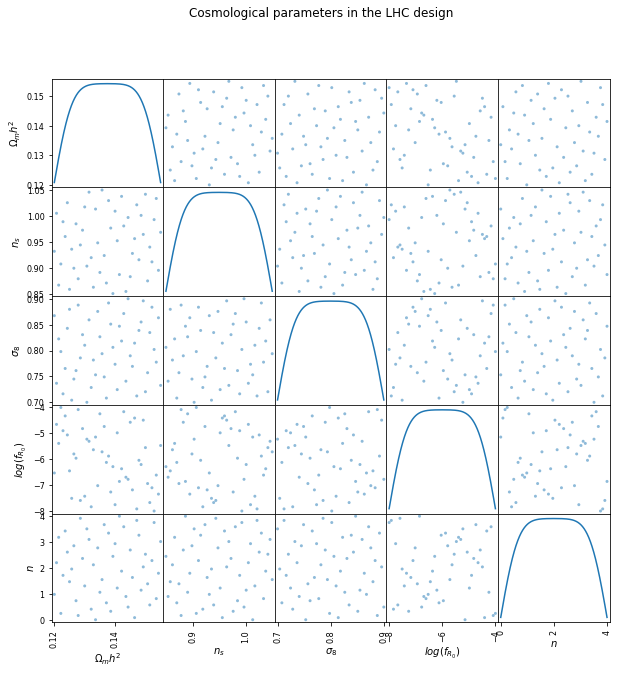

In [4]:
df = pd.DataFrame(parameter_array, columns=allLabels)
scatter_matrix(df, figsize=(10, 10), diagonal='kde')
plt.suptitle('Cosmological parameters in the LHC design')
plt.show()

## Enhancement in the matter power spectra, *P<sub>MG</sub>(k)/P<sub>LCDM</sub>(k)* for *f(R)* Hu-Sawicki model
Boost in the matter power spectra are calculated from COLA simulations, for 100 timesteps between $0 \leq z \leq 50$. 

In [6]:
snap_ID = 92 # 100 redshift snapshots in ID 0-99
fileIn = dataDir + 'ratiosbinsnew_' + str(snap_ID) + '.txt'
az = np.loadtxt(dataDir + 'timestepsCOLA.txt', skiprows=1) ## Redshift corresponding to snapshot IDs

loadFile = np.loadtxt(fileIn)
PmPl_all = loadFile[:, 1:].T
kvals = loadFile[:,0]
    
print('Training snapshot: ', str(snap_ID), PmPl_all.shape, parameter_array.shape)  
print(20*'=*')

Training snapshot:  92 (55, 213) (50, 5)
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*


In [67]:
1024**3

1073741824

In [72]:
(1000)**3-(980)**3

58808000

In [69]:
512**3

134217728

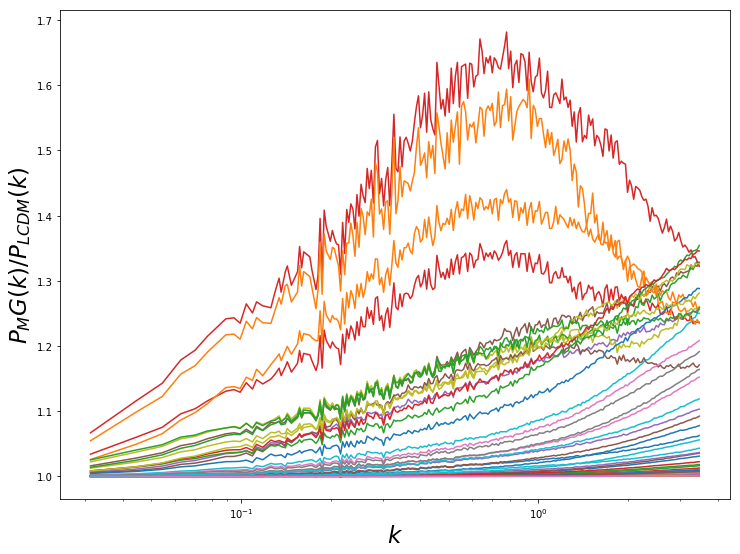

In [7]:
plt.figure(1, figsize=(12, 9) )
for i in range(50):
    plt.plot(kvals, PmPl_all[i])
plt.xscale('log')
plt.ylabel(r'$P_MG(k)/P_{LCDM}(k)$', fontsize=23)
plt.xlabel(r'$k$', fontsize=23)
plt.show()